In [1]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('synthetic.csv')

In [10]:
df.head(5)

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0


In [11]:
df.isnull().mean()*100

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64

In [59]:
imp = KNNImputer(weights='distance',add_indicator=False)
X = df.iloc[:,1:3]
Y = df.iloc[:,4:]

In [60]:
X.sample(5)

,Price,Rating
2848,5357.0,NaN
3186,9365.0,NaN
2199,2053.0,3.317306
2332,213.0,1.309339
3191,7370.0,NaN


In [61]:
Y.sample(5)

,Discount
3528,NaN
2462,35.0
1190,37.0
1232,NaN
651,2.0


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [63]:
x_train_imputed = imp.fit_transform(x_train)

In [64]:
x_train_imputed = pd.DataFrame(x_train_imputed, columns = x_train.columns)

In [65]:
x_train_imputed.sample(5)

,Price,Rating
458,8369.000000,1.774152
2506,4192.293567,1.495262
1049,5258.000000,2.690284
676,7292.000000,1.956200
2924,6160.000000,2.672130


In [66]:
x_train_imputed.isnull().mean()*100

Price     0.0
Rating    0.0
dtype: float64

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

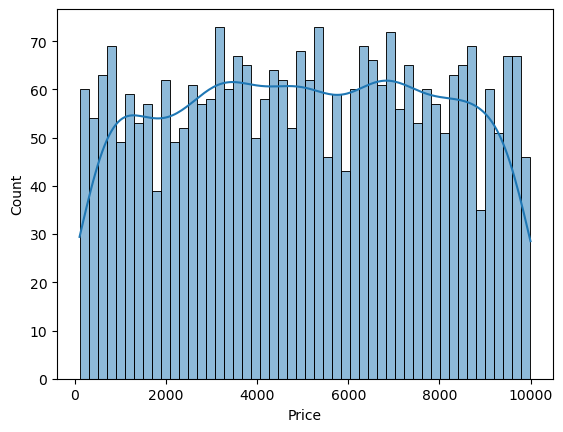

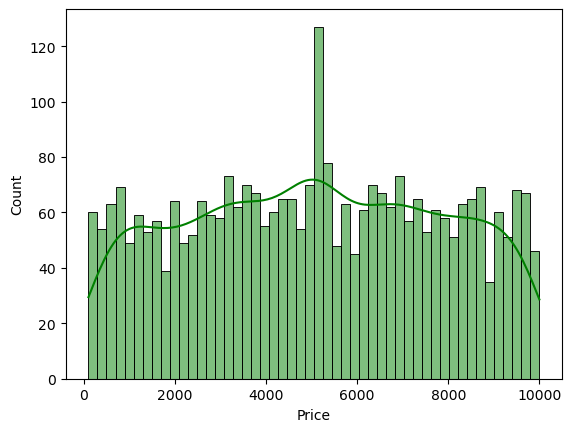

In [68]:
sns.histplot(bins = 50, x = x_train['Price'], kde = True)
plt.show()
sns.histplot(bins = 50, x = x_train_imputed['Price'], color = 'green', kde = True)
plt.show()

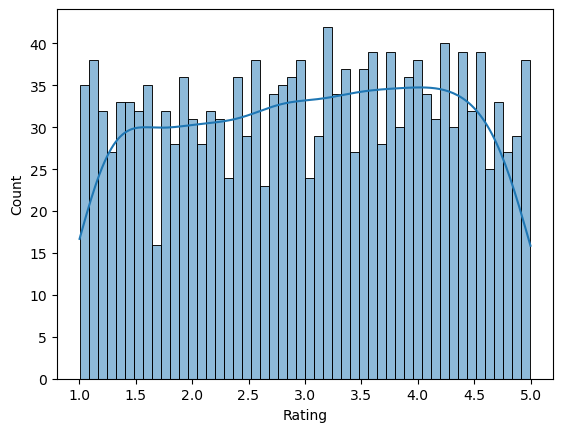

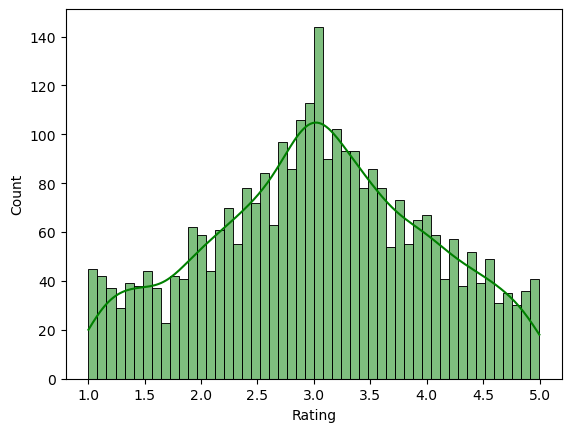

In [69]:
sns.histplot(bins = 50, x = x_train['Rating'], kde = True)
plt.show()
sns.histplot(bins = 50, x = x_train_imputed['Rating'], color = 'green', kde = True)
plt.show()